<a href="https://colab.research.google.com/github/thalitadru/ml-class-epf/blob/main/LabAssignmentTreesEnsembles_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercices
You have 6 exercises in this lab assignment, 3 of which are optional. 

**Note**: Use `random_seed=42` so we all get the same results.

*Credits:* Based on [code written by A. Géron](https://github.com/ageron/handson-ml2) for his book "Hands-on ML with scikit-learn, keras and tensorflow.", 2nd edition 2019, O'Reilly Media. Code realeased under [Apache-2.0 License](https://github.com/ageron/handson-ml2/blob/master/LICENSE).

In [4]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats


## Imbalanced classification with tree ensembles

### Data
[Predict students' dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [141]:
# fetch dataset 
from ucimlrepo import fetch_ucirepo 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
display(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
display(predict_students_dropout_and_academic_success.variables) 

{'uci_id': 697,
 'name': "Predict students' dropout and academic success",
 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success',
 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv',
 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.",
 'area': 'Othe

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


In [142]:
predict_students_dropout_and_academic_success.variables.iloc[-1].loc[ 'description']

'Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course'

(array([1421.,    0.,    0.,    0.,    0., 2209.,    0.,    0.,    0.,
         794.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

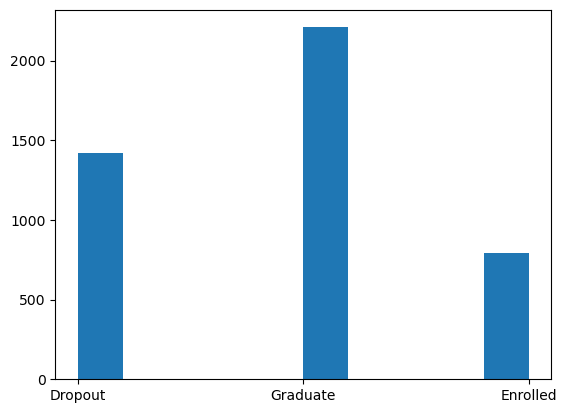

In [144]:
plt.hist(y)

### Exercise
1. For this dataset, try two types of tree ensembles:
    - [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
    - [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
1. Compare model scores on the training set vs the validation set. Are the models overfitting or underfitting?

1. Choose a pertinent hyperparameter that you will adjust in order to reduce the problem you just diagnosed. Try a few values to see if you find a better model.

1. Once you have found the best model, provide a detailed evaluation on the test set using the [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Make sure you understand what each of the results mean. 

1. Imagine the main goal of this study is to be able to retrieve students in difficulty and help them _before_ they dropout. Altough it is not desirable to overload student counseling professionals (suppose they can provide guidance to 30% of the students), it is ok to send to counseling a student who would graduate just fine without it. Not noticing a student in difficulty is a greater problem that may lead to delayed graduation (the "enroled" class) or dropouts. 
    - Which metric would be the most appropriate to evaluate this goal? 
    - Which model scored best on this metric?

1. It is possible to choose the probability threshold in order to trade-off precision for recall (or vice versa)
    - focus on the "Dropout" class (i.e., use it as your positive class, the others will be negative)
    - compute values of precision and recall for multiple tresholds using the function [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) 
    - find out the threhold and the precision you get for 85% recall. Does it seem like a reasonable trade-off given the context of the application?

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42)

In [165]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

random_forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
gbtrees_clf = GradientBoostingClassifier(random_state=42)


In [166]:
for estimator in [random_forest_clf, gbtrees_clf]:
    estimator.fit(X_train, y_train)
    print( "training score: ", estimator.score(X_train, y_train))
    print( "validation score: ", estimator.score(X_val, y_val))

C:\Users\tdrumond\AppData\Local\Temp\ipykernel_53108\270297196.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


training score:  1.0
validation score:  0.7542372881355932


c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training score:  0.8611797951253974
validation score:  0.7528248587570622


Trying to change some regularizing parameters to reduce overfitting:

In [174]:
random_forest_clf.set_params(min_samples_leaf=5)
random_forest_clf.fit(X_train, y_train)
print( "training score: ", random_forest_clf.score(X_train, y_train))
print( "validation score: ", random_forest_clf.score(X_val, y_val))

C:\Users\tdrumond\AppData\Local\Temp\ipykernel_53108\3103847853.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_clf.fit(X_train, y_train)


training score:  0.8873189685623455
validation score:  0.7471751412429378


#### Classification repport

In [149]:
from sklearn.metrics import classification_report

for estimator in [random_forest_clf, gbtrees_clf]:
    y_pred_val = estimator.predict(X_val)
    # y_pred_val = voting_clf.le_.inverse_transform(y_pred_val)
    print(f"Model: {estimator.__class__.__name__}")
    print(classification_report(y_val.squeeze(), y_pred_val))

Model: RandomForestClassifier
              precision    recall  f1-score   support

     Dropout       0.84      0.72      0.77       226
    Enrolled       0.57      0.33      0.42       133
    Graduate       0.75      0.94      0.83       349

    accuracy                           0.75       708
   macro avg       0.72      0.66      0.68       708
weighted avg       0.74      0.75      0.74       708

Model: GradientBoostingClassifier
              precision    recall  f1-score   support

     Dropout       0.82      0.70      0.76       226
    Enrolled       0.53      0.36      0.43       133
    Graduate       0.77      0.93      0.84       349

    accuracy                           0.75       708
   macro avg       0.71      0.67      0.68       708
weighted avg       0.74      0.75      0.74       708



,precision,recall,thresholds
379,0.601824,0.876106,0.166832
380,0.600610,0.871681,0.167305
382,0.601227,0.867257,0.169872
383,0.603077,0.867257,0.170855
384,0.604938,0.867257,0.171745
385,0.606811,0.867257,0.172951
386,0.608696,0.867257,0.173515
387,0.610592,0.867257,0.174382
388,0.612500,0.867257,0.176292
389,0.614420,0.867257,0.176609


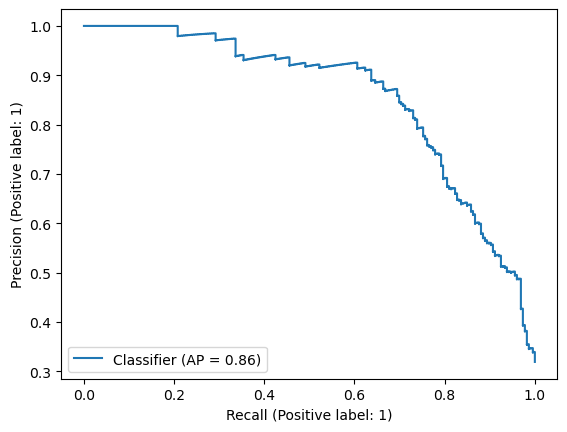

In [204]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

y_pred = random_forest_clf.predict_proba(X_val)[:,0]
y_true = np.where (y_val == 'Dropout', 1, 0)
PrecisionRecallDisplay.from_predictions(y_true, y_pred)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds': thresholds}).query("recall>0.85 & precision > 0.6")

,false positive rate,true positive rate,thresholds
0,0.000000,0.000000,1.999091
1,0.000000,0.004425,0.999091
2,0.000000,0.207965,0.929828
3,0.002075,0.207965,0.929724
4,0.002075,0.292035,0.895084
...,...,...,...
137,0.877593,0.986726,0.024253
138,0.877593,0.995575,0.023874
139,0.912863,0.995575,0.019095
140,0.912863,1.000000,0.018987


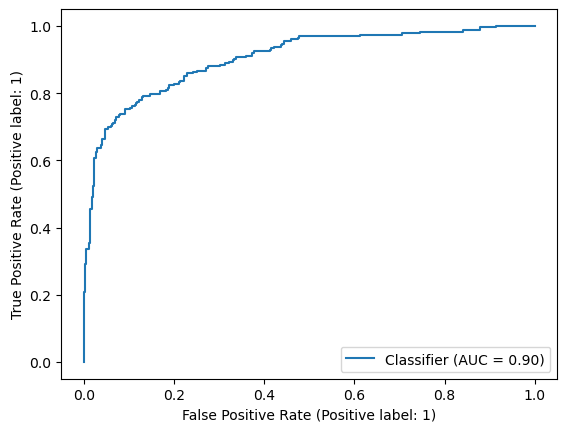

In [184]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_pred = random_forest_clf.predict_proba(X_val)[:,0]
y_true = np.where (y_val =='Dropout', 1, 0)
RocCurveDisplay.from_predictions(y_true, y_pred)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
pd.DataFrame({'false positive rate': fpr, 'true positive rate': tpr, 'thresholds': thresholds})

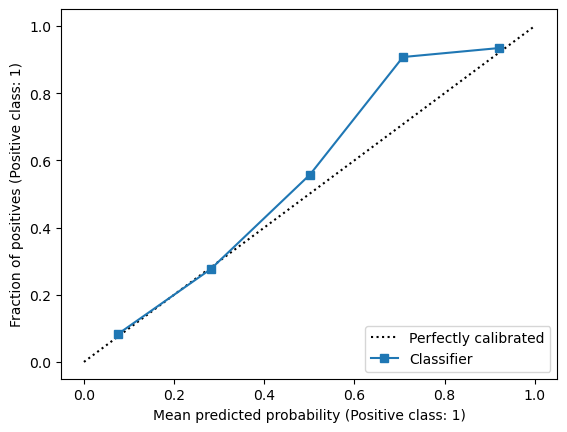

In [190]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

y_pred = random_forest_clf.predict_proba(X_val)[:,0]
y_true = np.where (y_val =='Dropout', 1, 0)
CalibrationDisplay.from_predictions(y_true, y_pred)
prob_true, prob_pred = calibration_curve(y_true, y_pred)


## (Optional) Feature importance on tree ensembles

### Exercise
Now that you have chosen the best model, let's retrieve which attributes are the main predictors of a student dropping out. This means we want to estimate *feature importance*. With tree ensembles, there are two main ways of doing so.

1. Compute feature importances using the [permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html). Get the top-10 most important features.

2. Compute feature importances following ["mean decrease in impurity (MDI)"](https://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation). These get precomputed during `fit`, and are based on the training set only. Get the feature importances computed from the random forest model trained before, and check the top-10 most important features. Are they the same as with the permutation method? Is their rank the same?

3. `sklearn`'s documentation warns about two main caveats of using MDI to estimate feature importance. Did you notice them in the docs? Which are they?

#### Feature importance via permutation
[Permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html)

In [70]:
from sklearn.inspection import permutation_importance


r = permutation_importance(random_forest_clf, X_val, y_val,
                           n_repeats=30,
                           random_state=42,
                           n_jobs=-1)


In [210]:
predict_students_dropout_and_academic_success.feature_names

In [212]:
importance_df = (pd.DataFrame({
    'features':predict_students_dropout_and_academic_success.variables['name'][:-1],
    'tree_importances': random_forest_clf.feature_importances_,
    'importances_mean': r.importances_mean,
    'importances_std':r.importances_std})
    
)
display(importance_df.sort_values(by="importances_mean", ascending=False)[:10])
display(importance_df.sort_values(by="tree_importances", ascending=False)[:10])

,features,tree_importances,importances_mean,importances_std
30,Curricular units 2nd sem (approved),0.192688,0.081497,0.010088
24,Curricular units 1st sem (approved),0.136538,0.052495,0.011032
16,Tuition fees up to date,0.049729,0.047222,0.006771
31,Curricular units 2nd sem (grade),0.146422,0.033098,0.007904
1,Application mode,0.015221,0.018267,0.005221
29,Curricular units 2nd sem (evaluations),0.040497,0.016055,0.005829
17,Gender,0.006040,0.013795,0.004105
22,Curricular units 1st sem (enrolled),0.019720,0.013465,0.003940
3,Course,0.033999,0.012335,0.005371
10,Mother's occupation,0.013292,0.012288,0.004302


,features,tree_importances,importances_mean,importances_std
30,Curricular units 2nd sem (approved),0.192688,0.081497,0.010088
31,Curricular units 2nd sem (grade),0.146422,0.033098,0.007904
24,Curricular units 1st sem (approved),0.136538,0.052495,0.011032
25,Curricular units 1st sem (grade),0.059896,0.010734,0.006983
16,Tuition fees up to date,0.049729,0.047222,0.006771
29,Curricular units 2nd sem (evaluations),0.040497,0.016055,0.005829
19,Age at enrollment,0.039101,0.012053,0.006742
3,Course,0.033999,0.012335,0.005371
23,Curricular units 1st sem (evaluations),0.033297,0.007580,0.005464
12,Admission grade,0.027540,0.011441,0.006246


In [ ]:
sns.barplot()

## Voting Classifier on MNIST
### Data
This exercise uses the MNIST dataset: a set of 28x28 images containing hadnwritten 0-9 digits. It can be loaded using `sklern` functions as follows:

In [108]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Here the feaures in `X` are simply all the 784 pixels of any given image, in vectorized form. To visualize the orignal image, the vector must be reshaped back to a 2D array as follows:

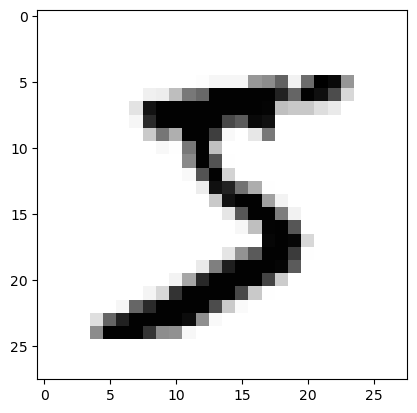

In [109]:
plt.imshow(X[0, :].reshape([28, 28]), cmap='Greys')

**The goal** is to correctly predict the digit from the image pixels. This is what you have in the `y` array:

In [110]:
y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Feature range and scaling
In general, that pixel values here range in 0-255. However, since digits are always cented, pixels in the center of the image tend to have a larger variance than those at the border. To visualize this, observe the plotting of the stddev for each pixel across all images. See how pixels at the border have near 0 variance while  those at the center have a much large one.

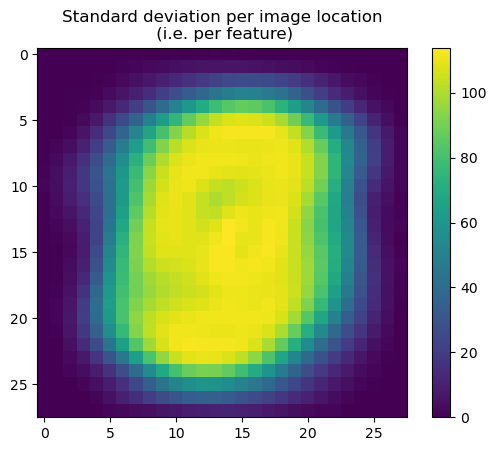

In [111]:
plt.imshow(X.std(axis=0).reshape([28,28]))
plt.colorbar()
plt.title("Standard deviation per image location\n (i.e. per feature)")
plt.show()

Remember models trained with continuous optimization (especially 1st order methods) benefit from features having a similar range (because this leads to better conditioned cost functions). For these methods **it is recommended that you apply some form of feature scaling**. For example, after applying standard scaling, variances become mostly equal to 1, meaning all features lie in a similar range:

Text(0.5, 1.0, 'Standard deviation per image location\n (i.e. per feature)')

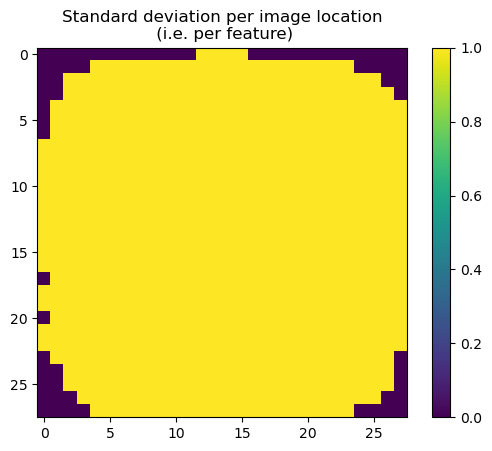

In [112]:
from sklearn.preprocessing import StandardScaler

X_proc = StandardScaler().fit_transform(X)

plt.imshow(X_proc.std(axis=0).reshape([28,28]))
plt.colorbar()
plt.title("Standard deviation per image location\n (i.e. per feature)")


Note that some pixels still have 0 standard deviation. This happens because they are always zero across all images. We will further process the data to remove these pixel features from our data.

In [113]:
X_proc = X_proc[: , X_proc.std(axis=0) != 0]

### Exercise


1. Load the MNIST data and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). 

1. Fit a voting ensemble combining multple models. Include:  
    - a [`RandomForestClassifier`](),
    - an [`ExtraTreesClassifier`](),
    - and a [`LinearSVC`](). 


1. Evaluate the accuracy of the ensemble model and compare it to that if its member models. Does the ensemble outperform all of the included models?

1. Remove the weakest model of the ensemble, then re-evaluate the ensemble's accuracy. Did it get better?

1. Try using soft voting this time and compare the accuracy to hard voting. Does soft voting outperform all individual models?



Exercise: _Load the MNIST data and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing)._

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_proc, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

In [119]:
random_forest_clf = RandomForestClassifier(
    n_estimators=50, max_depth=10, 
    random_state=42, n_jobs=-1)
extra_trees_clf = ExtraTreesClassifier(
    n_estimators=50, max_depth=10, 
    random_state=42, n_jobs=-1)
svm_clf = LinearSVC(max_iter=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), 
                        max_iter=100,
                        random_state=42)

Exercise: _Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier._

In [120]:
from sklearn.ensemble import VotingClassifier

In [121]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [122]:
voting_clf = VotingClassifier(named_estimators, n_jobs=-1)

In [123]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(max_depth=10,
                                                   n_estimators=50, n_jobs=-1,
                                                   random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42)),
                             ('mlp_clf',
                              MLPClassifier(hidden_layer_sizes=(50,),
                                            max_iter=100, random_state=42))],
                 n_jobs=-1)

_Evaluate the accuracy of the ensemble model and compare it to that if its member models. Does the ensemble outperform all of the included models?_

In [124]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9433, 0.9349, 0.8698, 0.9684]

In [125]:
voting_clf.score(X_val, y_val)

0.9522

_Exercise: Remove the weakest model of the ensemble`, then re-evaluate the ensemble's accuracy. Did it get better_

Let's remove the SVM to see if performance improves. It is possible to remove an estimator by setting it to `'drop'` using `set_params()` like this:

In [128]:
voting_clf.set_params(svm_clf='drop')

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(max_depth=10,
                                                   n_estimators=50, n_jobs=-1,
                                                   random_state=42)),
                             ('svm_clf', 'drop'),
                             ('mlp_clf',
                              MLPClassifier(hidden_layer_sizes=(50,),
                                            max_iter=100, random_state=42))],
                 n_jobs=-1)

This updated the list of estimators:

In [129]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                         random_state=42)),
 ('extra_trees_clf',
  ExtraTreesClassifier(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)),
 ('svm_clf', 'drop'),
 ('mlp_clf',
  MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42))]

However, it did not update the list of _trained_ estimators.

In [130]:
voting_clf.estimators_

[RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                        random_state=42),
 ExtraTreesClassifier(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42),
 LinearSVC(max_iter=100, random_state=42),
 MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)]

So we can either fit the `VotingClassifier` again, or just remove the SVM from the list of trained estimators:

In [131]:
del voting_clf.estimators_[2]

Now let's evaluate the `VotingClassifier` again:

In [132]:
voting_clf.score(X_val, y_val)

0.9521

A bit better! The SVM was hurting performance. 

_Exercise: Try using soft voting this time and compare the accuracy to hard voting._

Now let's try using a soft voting classifier. We do not actually need to retrain the classifier, we can just set `voting` to `"soft"`:

In [133]:
voting_clf.voting = "soft"

In [134]:
voting_clf.score(X_val, y_val)

0.9723

## Stacking Ensemble on MNIST
1. Using the same estimators as the previous voting classifier, now train a stacking ensemble. Use a logsitic regression as your blender model.

1. How does it compare to the voting classifier you trained earlier?

1. You have tried 3 different voting ensembles and a stacking ensemble. Which one would you choose for deployment? Estimate the expected generalization performance by evaluating the best ensemble on the test set.

Exercise: _Using the same estimators as the previous voting classifier, now train a stacking ensemble. Use a logsitic regression as your blender model._

In [175]:
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(
    estimators=named_estimators,
    cv=5)
stack.fit(X_train, y_train)
stack.score(X_val, y_val)

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tdrumon

0.7598870056497176

This stacking ensemble does not perform as well as the voting classifier we trained earlier, it's not quite as good as the best individual classifier.

_Exercise: You have tried 3 different voting ensembles and a stacking ensemble. Which one would you choose for deployment? Estimate the expected generalization performance by evaluating the best model on the test set._

Soft votting got the best validation score. We keep it for evaluation in the test set.

In [ ]:
voting_clf.voting = "soft"
voting_clf.score(X_test, y_test)

0.9698

In [ ]:
voting_clf.estimators_

[RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                        random_state=42),
 ExtraTreesClassifier(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42),
 MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)]

In [ ]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9645, 0.9691, 0.9719]

The voting classifier only very slightly reduced the error rate of the best model in this case.

## (Optional) Train and fine-tune a decision tree
Train and fine-tune a Decision Tree for the moons dataset by following these steps:  
  1. Use `make_moons(n_samples=10000, noise=0.4)` to generate a moons dataset.   
  1. Use `train_test_split()` to split the dataset into a training set and a test set.
  1. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.
  1. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

_Exercise: train and fine-tune a Decision Tree for the moons dataset._

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

Adding `random_state=42` to make this notebook's output constant:

In [36]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [39]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [40]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## (Optional) Grow your own random forest
Grow a forest by following these steps:  
  
  1. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. *Hint*: you can use ScikitLearn’s `ShuffleSplit` class for this.  
  1. Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.  
  1. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.  
  1. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher).   
  1. Congratulations, you have trained a Random Forest classifier!

_Exercise: Grow a forest._

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [41]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [42]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [43]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [44]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [45]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872